# PUTRI AULIA IRWAN
202131015

# Import library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#dapat menggabungkan kekuatan OpenCV untuk pengolahan gambar

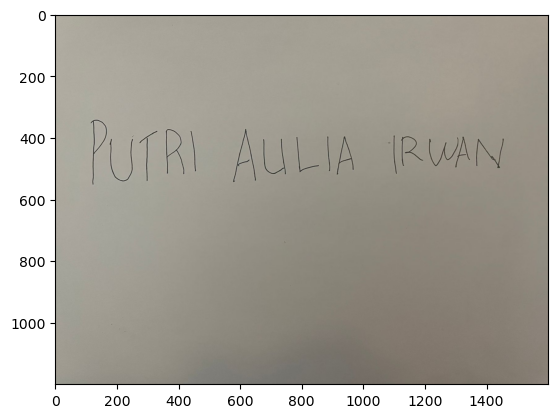

In [2]:
img = cv2.imread('putriauliairwan.jpeg') #Membaca gambar dengan nama file 'putriauliairwan.jpeg' menggunakan fungsi imread() dari OpenCV

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #mengonversi format warna gambar dari BGR (yang digunakan oleh OpenCV) ke RGB (yang digunakan oleh Matplotlib) menggunakan fungsi cvtColor() dari OpenCV

plt.imshow(img)
plt.show()

# Preprocessing

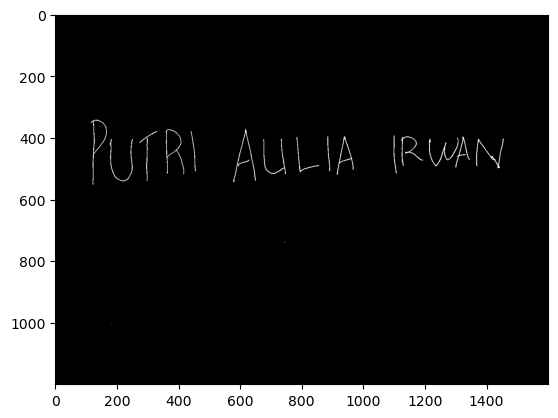

In [3]:
def thresholding (image): # yang melakukan thresholding pada gambar input dan mengembalikan hasil thresholding dalam bentuk citra biner
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Mengonversi gambar input ke citra grayscale menggunakan fungsi cvtColor() dari OpenCV
    ret, thresh = cv2.threshold (img_gray, 100, 200, cv2.THRESH_BINARY_INV)#Melakukan thresholding pada citra grayscale menggunakan fungsi threshold() dari OpenCV
    plt.imshow(thresh, cmap="gray")#Menampilkan citra hasil thresholding menggunakan fungsi imshow() dari Matplotlib
    return thresh #Mengembalikan citra hasil thresholding sebagai output dari fungsi

thresh_img = thresholding (img);

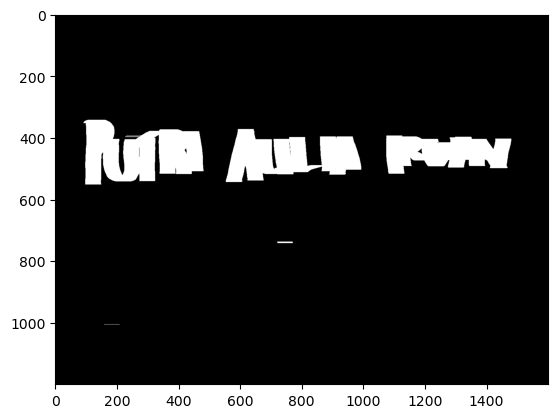

In [4]:
kernel = np.ones((1,50), np.uint8)#Membuat kernel dengan ukuran 1x50 (1 baris dan 50 kolom) yang terdiri dari elemen-elemen bernilai 1 menggunakan NumPy
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)#Melakukan operasi dilasi pada citra biner thresh_img menggunakan fungsi dilate() dari OpenCV
plt.imshow(dilated, cmap='gray')#Menampilkan citra hasil dilasi menggunakan fungsi imshow() dari Matplotlib

In [5]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#Mencari kontur dalam citra hasil dilasi menggunakan fungsi findContours() dari OpenCV
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)#Mengurutkan daftar kontur (contours) berdasarkan posisi y (koordinat y) dari kotak pembatas yang melingkupi setiap kontur

# Line Segmentation

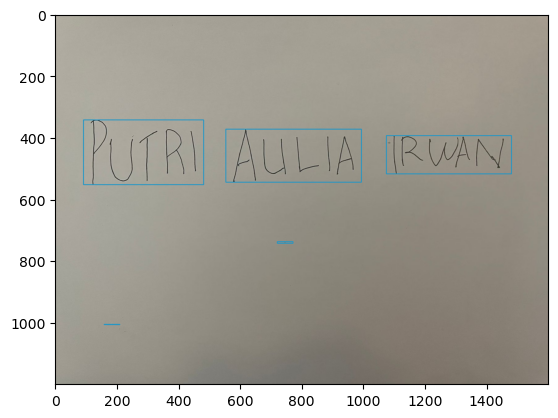

In [6]:
img2 = img.copy()#Membuat salinan gambar asli (img) menggunakan metode copy() agar gambar asli tidak diubah

for ctr in sorted_contours_lines:#Melakukan loop pada setiap kontur yang telah diurutkan (sorted_contours_lines)
    
    x,y,w,h = cv2.boundingRect(ctr)#Mengambil koordinat x, y (posisi kiri atas) serta lebar dan tinggi kotak pembatas yang melingkupi kontur saat ini menggunakan fungsi boundingRect() dari OpenCV
    cv2.rectangle(img2, (x,y), (x+w, y+h), (30, 150, 200), 2)#Menggambar kotak pembatas berwarna biru pada gambar salinan (img2) dengan menggunakan fungsi rectangle() dari OpenCV
    
plt.imshow(img2);#Menampilkan gambar hasil dengan menggunakan fungsi imshow() dari Matplotlib

# Text segmentation

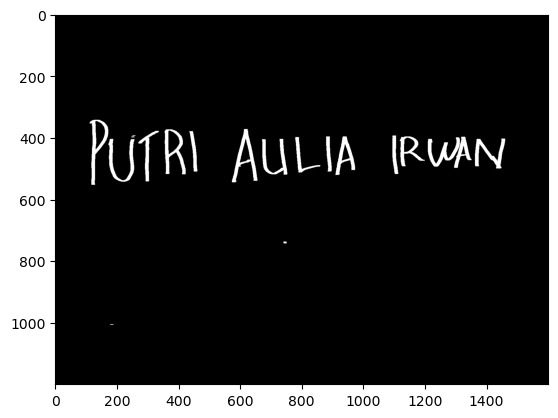

In [7]:
kernel = np.ones((2,10), np.uint8)#Membuat kernel baru dengan ukuran 2x10 (2 baris dan 10 kolom) yang terdiri dari elemen-elemen bernilai 1 menggunakan NumPy
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)#Melakukan operasi dilasi pada citra biner thresh_img menggunakan kernel baru (kernel) dan jumlah iterasi sebanyak 1
plt.imshow(dilated2, cmap='gray');#Menampilkan citra hasil dilasi yang baru (dilated2) menggunakan fungsi imshow() dari Matplotlib

# Character Segmentation

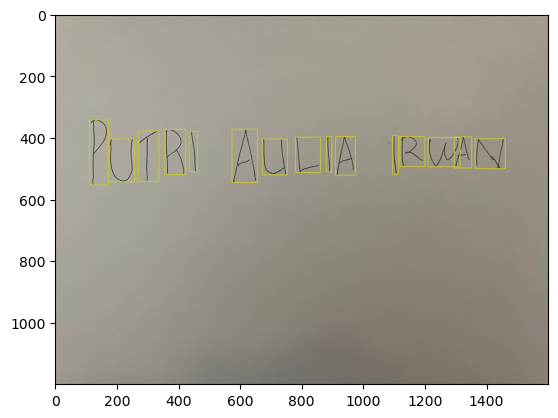

In [8]:
img3 = img.copy()#Membuat salinan gambar asli (img) menggunakan metode copy() agar gambar asli tidak diubah
words_list = []#Membuat daftar kosong (words_list) untuk menyimpan koordinat kotak pembatas setiap kata

for line in sorted_contours_lines:#Melakukan loop pada setiap kontur (line) yang telah diurutkan berdasarkan posisi y
    
    
    x, y, w, h = cv2.boundingRect(line)#Mengambil koordinat dan ukuran kotak pembatas yang melingkupi setiap baris teks menggunakan fungsi boundingRect() dari OpenCV
    roi_line = dilated2[y:y+w, x:x+w]#Mendapatkan ROI (Region of Interest) atau bagian dari gambar hasil dilasi (dilated2) yang sesuai dengan kotak pembatas baris teks
    
    
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)#Mencari kontur pada ROI baris teks menggunakan fungsi findContours() dari OpenCV
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])#Mengurutkan kontur dalam ROI berdasarkan posisi x (nilai koordinat x) dari kotak pembatas yang melingkupi setiap kontur
    
    for word in sorted_contour_words:#Melakukan loop pada setiap kontur (word) dalam kontur-kontur kata yang telah diurutkan
        
        if cv2.contourArea(word) < 300:#Melakukan pengecekan jika luas kontur kurang dari 300 piksel, maka kontur tersebut diabaikan dan lanjut ke kontur selanjutnya
            continue
        
        x2, y2, w2, h2 = cv2.boundingRect(word)#Mengambil koordinat dan ukuran kotak pembatas yang melingkupi setiap kata dalam baris teks
        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])#Menambahkan koordinat kotak pembatas setiap kata ke dalam words_list
        cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (200,200,50),2)#Menggambar kotak pembatas berwarna kuning pada gambar salinan (img3) di sekitar setiap kata menggunakan fungsi rectangle() dari OpenCV
        
plt.imshow(img3);

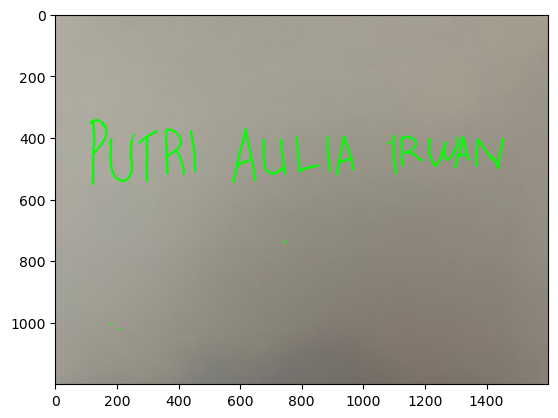

In [13]:
img2 = cv2.imread('putriauliairwan.jpg')#Membaca citra dengan nama file 'putriauliairwan.jpg' menggunakan fungsi imread() dari OpenCV
if len(contours) != 0:#Mengecek apakah terdapat kontur yang ditemukan dalam variabel contours
	c = max(contours, key = cv2.contourArea)
cv2.drawContours(img2, c, -1, (0, 255, 0), 3)#Menggambar kontur terbesar pada citra img2 menggunakan fungsi drawContours() dari OpenCV
cv2.imshow('Largest Contour', img)#Menampilkan citra dengan judul "Largest Contour" menggunakan fungsi imshow() dari OpenCV
cv2.imwrite('LargestContour.jpg', img) #Menyimpan citra dengan nama file 'LargestContour.jpg' menggunakan fungsi imwrite() dari OpenCV
cv2.waitKey(0) #Menunggu pengguna menekan tombol apa pun untuk menutup jendela tampilan citra

plt.imshow(img)
plt.show()